In [282]:
import yfinance as yf
import pandas as pd
import numpy as np

In [283]:
stock_1='^NSEI'

In [284]:
data_1 = yf.download(stock_1, '2010-01-01', '2023-05-01')

[*********************100%***********************]  1 of 1 completed


In [285]:
stock_2='^IXIC'

In [286]:
data_2 = yf.download(stock_2, '2010-01-01', '2023-05-01') 

[*********************100%***********************]  1 of 1 completed


In [287]:
data_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


In [288]:
data_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000


In [289]:
merged_df = pd.merge(data_1, data_2, on='Date')

In [290]:
merged_df

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000


In [291]:
merged_df['Covariance'] = merged_df['Close_x'].cov(merged_df['Close_y'])
merged_df['Correlation'] = merged_df['Close_x'].corr(merged_df['Close_y'])

In [292]:
merged_df['DailyReturn_x'] = merged_df['Close_x'].pct_change()
merged_df['DailyReturn_y'] = merged_df['Close_y'].pct_change()

In [293]:
merged_df['Covariance_DailyReturns'] = merged_df['DailyReturn_x'].cov(merged_df['DailyReturn_y'])
merged_df['Correlation_DailyReturns'] = merged_df['DailyReturn_x'].corr(merged_df['DailyReturn_y'])

In [294]:
merged_df.head()

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Covariance,Correlation,DailyReturn_x,DailyReturn_y,Covariance_DailyReturns,Correlation_DailyReturns
Date,,,,,,,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,1.421834e+07,0.951314,NaN,NaN,0.00004,0.273153
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,1.421834e+07,0.951314,0.008734,0.000126,0.00004,0.273153
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,1.421834e+07,0.951314,0.000739,-0.003300,0.00004,0.273153
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,1.421834e+07,0.951314,-0.003540,-0.000452,0.00004,0.273153
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.421834e+07,0.951314,-0.003487,0.007443,0.00004,0.273153


In [295]:
column_means = merged_df.mean()
merged_df = merged_df.fillna(column_means)

In [296]:
merged_df.head()

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Covariance,Correlation,DailyReturn_x,DailyReturn_y,Covariance_DailyReturns,Correlation_DailyReturns
Date,,,,,,,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,1.421834e+07,0.951314,0.000450,0.000612,0.00004,0.273153
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,1.421834e+07,0.951314,0.008734,0.000126,0.00004,0.273153
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,1.421834e+07,0.951314,0.000739,-0.003300,0.00004,0.273153
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,1.421834e+07,0.951314,-0.003540,-0.000452,0.00004,0.273153
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.421834e+07,0.951314,-0.003487,0.007443,0.00004,0.273153


In [297]:
merged_df['Correlation']

Date
2010-01-04    0.951314
2010-01-05    0.951314
2010-01-06    0.951314
2010-01-07    0.951314
2010-01-08    0.951314
                ...   
2023-04-24    0.951314
2023-04-25    0.951314
2023-04-26    0.951314
2023-04-27    0.951314
2023-04-28    0.951314
Name: Correlation, Length: 3182, dtype: float64

In [298]:
new_df=pd.merge(data_1['Close'], data_2['Close'], on='Date')

In [299]:
new_df.head()

,Close_x,Close_y
Date,,
2010-01-04,5232.200195,2308.419922
2010-01-05,5277.899902,2308.709961
2010-01-06,5281.799805,2301.090088
2010-01-07,5263.100098,2300.050049
2010-01-08,5244.750000,2317.169922


In [300]:
new_df["NDAQ_lead"]=new_df.Close_y.shift(-1)  
new_df["NSEI_lead"]=new_df.Close_x.shift(-1)
new_df.head()

,Close_x,Close_y,NDAQ_lead,NSEI_lead
Date,,,,
2010-01-04,5232.200195,2308.419922,2308.709961,5277.899902
2010-01-05,5277.899902,2308.709961,2301.090088,5281.799805
2010-01-06,5281.799805,2301.090088,2300.050049,5263.100098
2010-01-07,5263.100098,2300.050049,2317.169922,5244.750000
2010-01-08,5244.750000,2317.169922,2312.409912,5249.399902


In [301]:
new_df.corr()

,Close_x,Close_y,NDAQ_lead,NSEI_lead
Close_x,1.000000,0.951314,0.950774,0.999632
Close_y,0.951314,1.000000,0.999563,0.951650
NDAQ_lead,0.950774,0.999563,1.000000,0.951295
NSEI_lead,0.999632,0.951650,0.951295,1.000000


In [302]:
for i in range(20):
    print("NSEI Lead_Day",i,new_df.Close_x.shift(-i).corr(new_df.Close_y))

NSEI Lead_Day 0 0.9513138758576782
NSEI Lead_Day 1 0.9516503507715612
NSEI Lead_Day 2 0.9517639726726099
NSEI Lead_Day 3 0.9518652512683704
NSEI Lead_Day 4 0.9519697336679616
NSEI Lead_Day 5 0.9520755817110506
NSEI Lead_Day 6 0.9521699858696246
NSEI Lead_Day 7 0.9522823272755725
NSEI Lead_Day 8 0.9523740066690727
NSEI Lead_Day 9 0.9524293216670952
NSEI Lead_Day 10 0.9524489370596478
NSEI Lead_Day 11 0.9524735208555901
NSEI Lead_Day 12 0.9525046891612216
NSEI Lead_Day 13 0.9525043391188188
NSEI Lead_Day 14 0.9524763924945748
NSEI Lead_Day 15 0.9524737996586063
NSEI Lead_Day 16 0.9524759625738246
NSEI Lead_Day 17 0.9524841326289566
NSEI Lead_Day 18 0.952495824185717
NSEI Lead_Day 19 0.9525336797311329


In [303]:
for i in range(20):
    print("NSDQ Lead_Day",i,new_df.Close_y.shift(-i).corr(new_df.Close_x))

NSDQ Lead_Day 0 0.9513138758576782
NSDQ Lead_Day 1 0.9507737700328761
NSDQ Lead_Day 2 0.9502862801160051
NSDQ Lead_Day 3 0.9497767429972325
NSDQ Lead_Day 4 0.949283975816037
NSDQ Lead_Day 5 0.9487513102148089
NSDQ Lead_Day 6 0.9482362261854126
NSDQ Lead_Day 7 0.9477096919386553
NSDQ Lead_Day 8 0.9471446302076986
NSDQ Lead_Day 9 0.9466095202451903
NSDQ Lead_Day 10 0.9460633295628977
NSDQ Lead_Day 11 0.9455306106805282
NSDQ Lead_Day 12 0.9449920822098847
NSDQ Lead_Day 13 0.9444449257356795
NSDQ Lead_Day 14 0.9439585841757135
NSDQ Lead_Day 15 0.943467591905385
NSDQ Lead_Day 16 0.9429986459534779
NSDQ Lead_Day 17 0.9425051748837592
NSDQ Lead_Day 18 0.9419817711760605
NSDQ Lead_Day 19 0.9414671972645146


In [ ]:
## Since NSE lead day have more correlation value we can conculde that NSE is leading

In [304]:
import talib as talib
import matplotlib.pyplot as plt

In [305]:
macd_nse, macdsignal_nse, macdhist_nse = talib.MACD(data_1['Close'].values)
macd_nasdaq, macdsignal_nasdaq, macdhist_nasdaq = talib.MACD(merged_df['Close_y'].values)


In [306]:
data_1['MACD']=macd_nse
data_1['MACDsig']=macdsignal_nse
data_1['macdhist_nse']=macdhist_nse

In [307]:
len(merged_df)

3182

In [308]:
merged_df['MACD_NDQ']=macd_nasdaq
merged_df['MACDsig_NDQ']=macdsignal_nasdaq
merged_df['macdhist_ndq']=macdhist_nasdaq

In [309]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:     
            sell_list.append(np.nan)              
            if flag != 1:                          
                buy_list.append(df['Close'][i])    
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)   

In [310]:
def generate_signals_2(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD_NDQ'][i] > df['MACDsig_NDQ'][i]:     
            sell_list.append(np.nan)              
            if flag != 1:                          
                buy_list.append(df['Close_y'][i])    
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD_NDQ'][i] < df['MACDsig_NDQ'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close_y'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)   

In [311]:
signal = generate_signals(data_1)

In [312]:
signal_2=generate_signals_2(merged_df)

In [313]:
data_1['buysig_macd'] = signal[0]
data_1['sellsig_macd'] = signal[1]

In [314]:
merged_df['buysig_macd'] = signal_2[0]
merged_df['sellsig_macd'] = signal_2[1]

In [315]:
data_1.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,MACDsig,macdhist_nse,buysig_macd,sellsig_macd
Date,,,,,,,,,,,
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,89.150961,58.377980,30.772980,NaN,NaN
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,95.090728,65.720530,29.370198,NaN,NaN
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,102.198597,73.016143,29.182454,NaN,NaN
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,114.695755,81.352066,33.343690,NaN,NaN
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300,135.141663,92.109985,43.031678,NaN,NaN


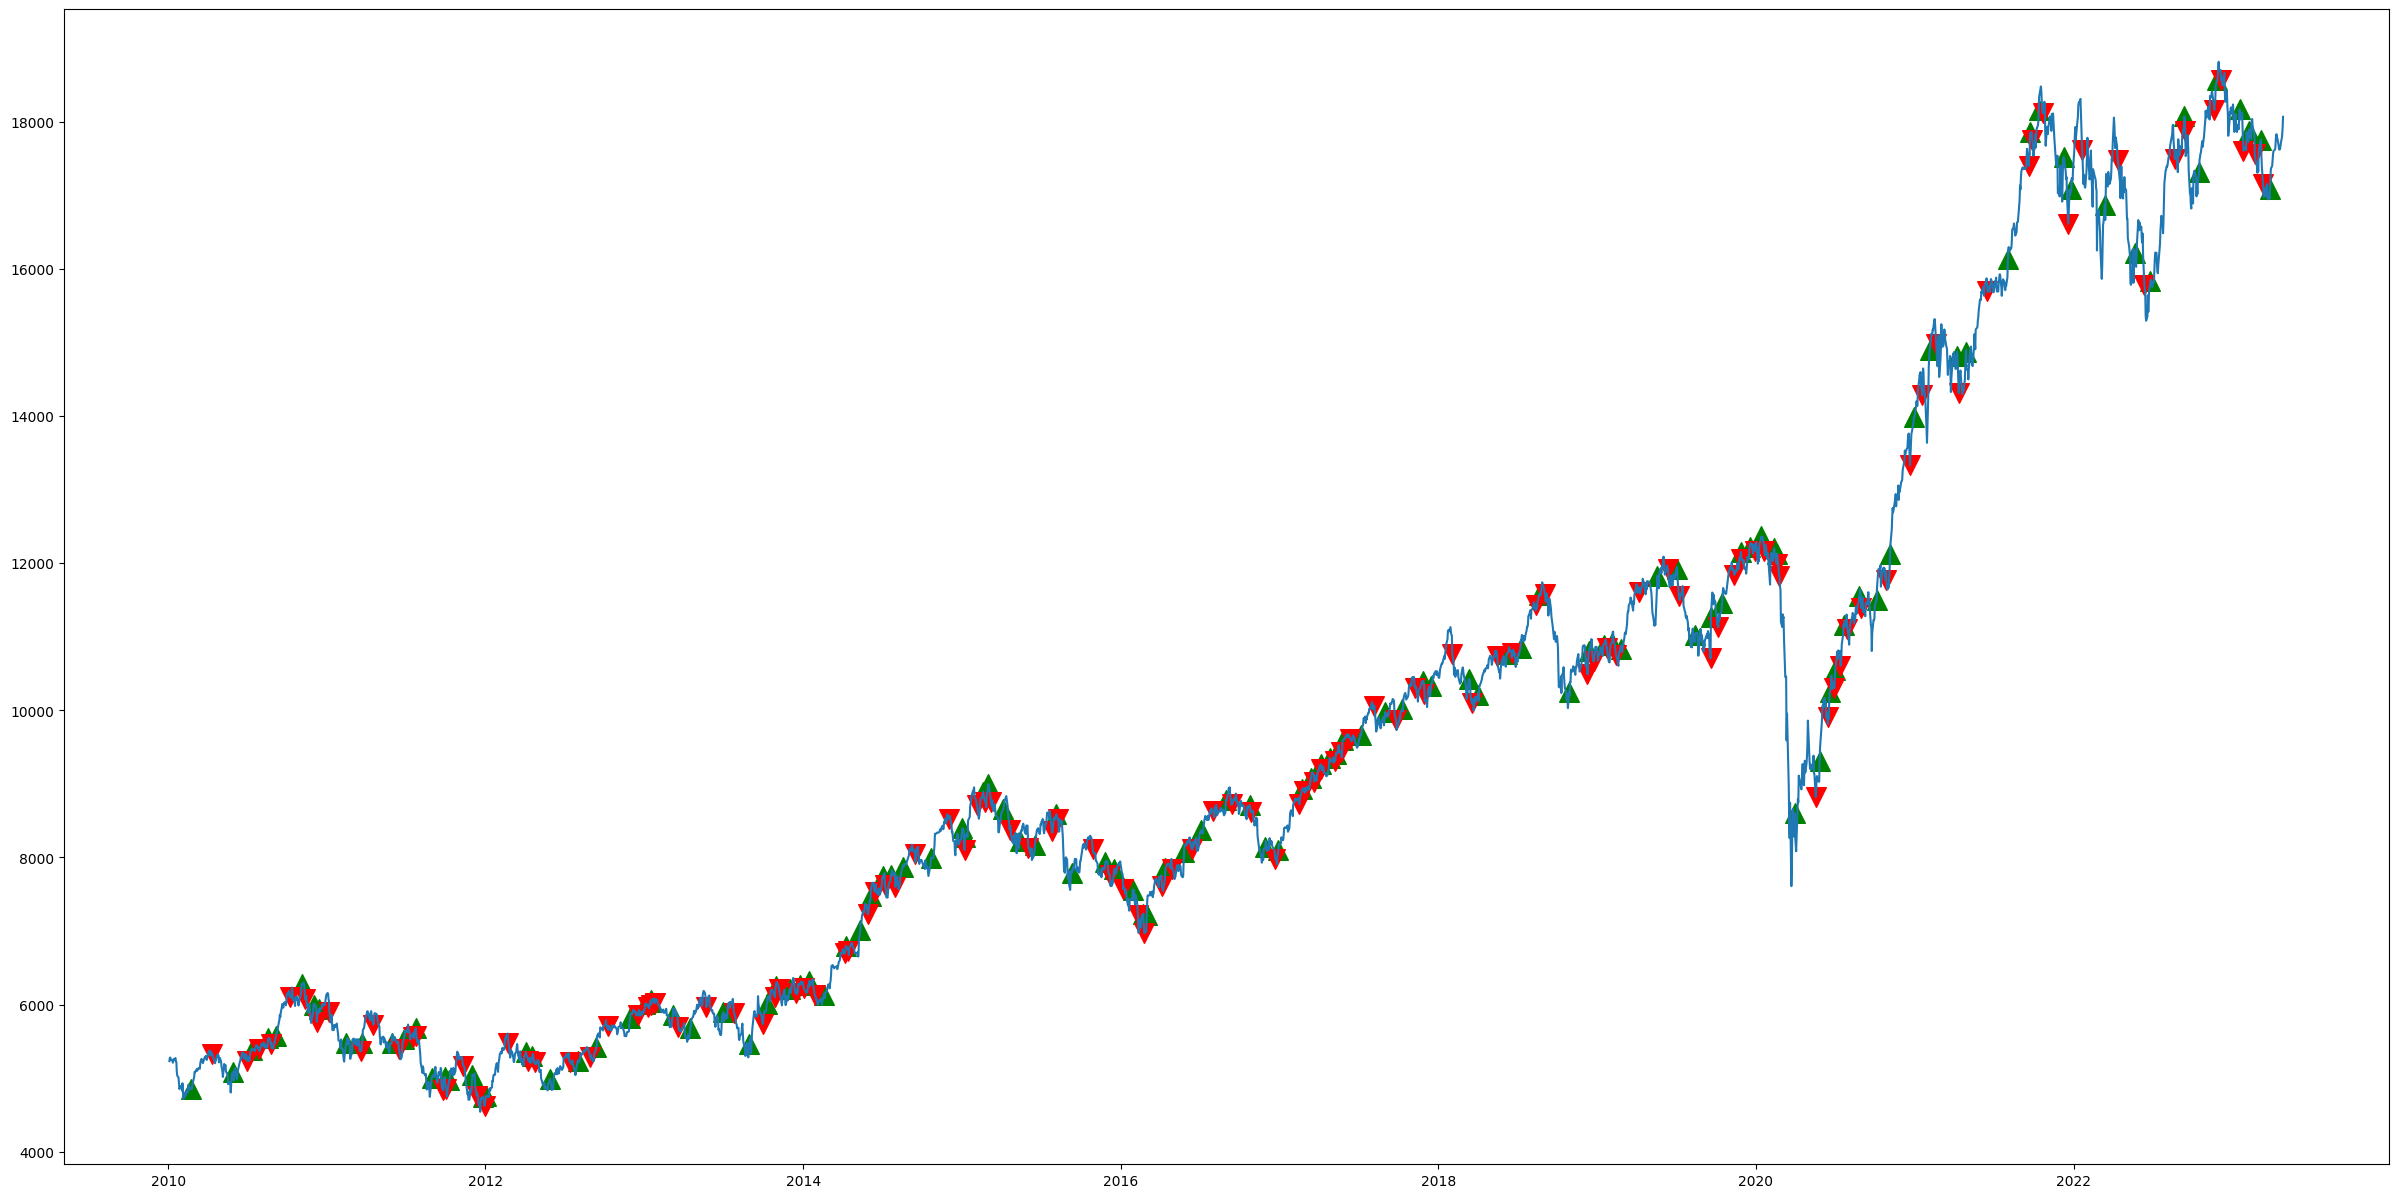

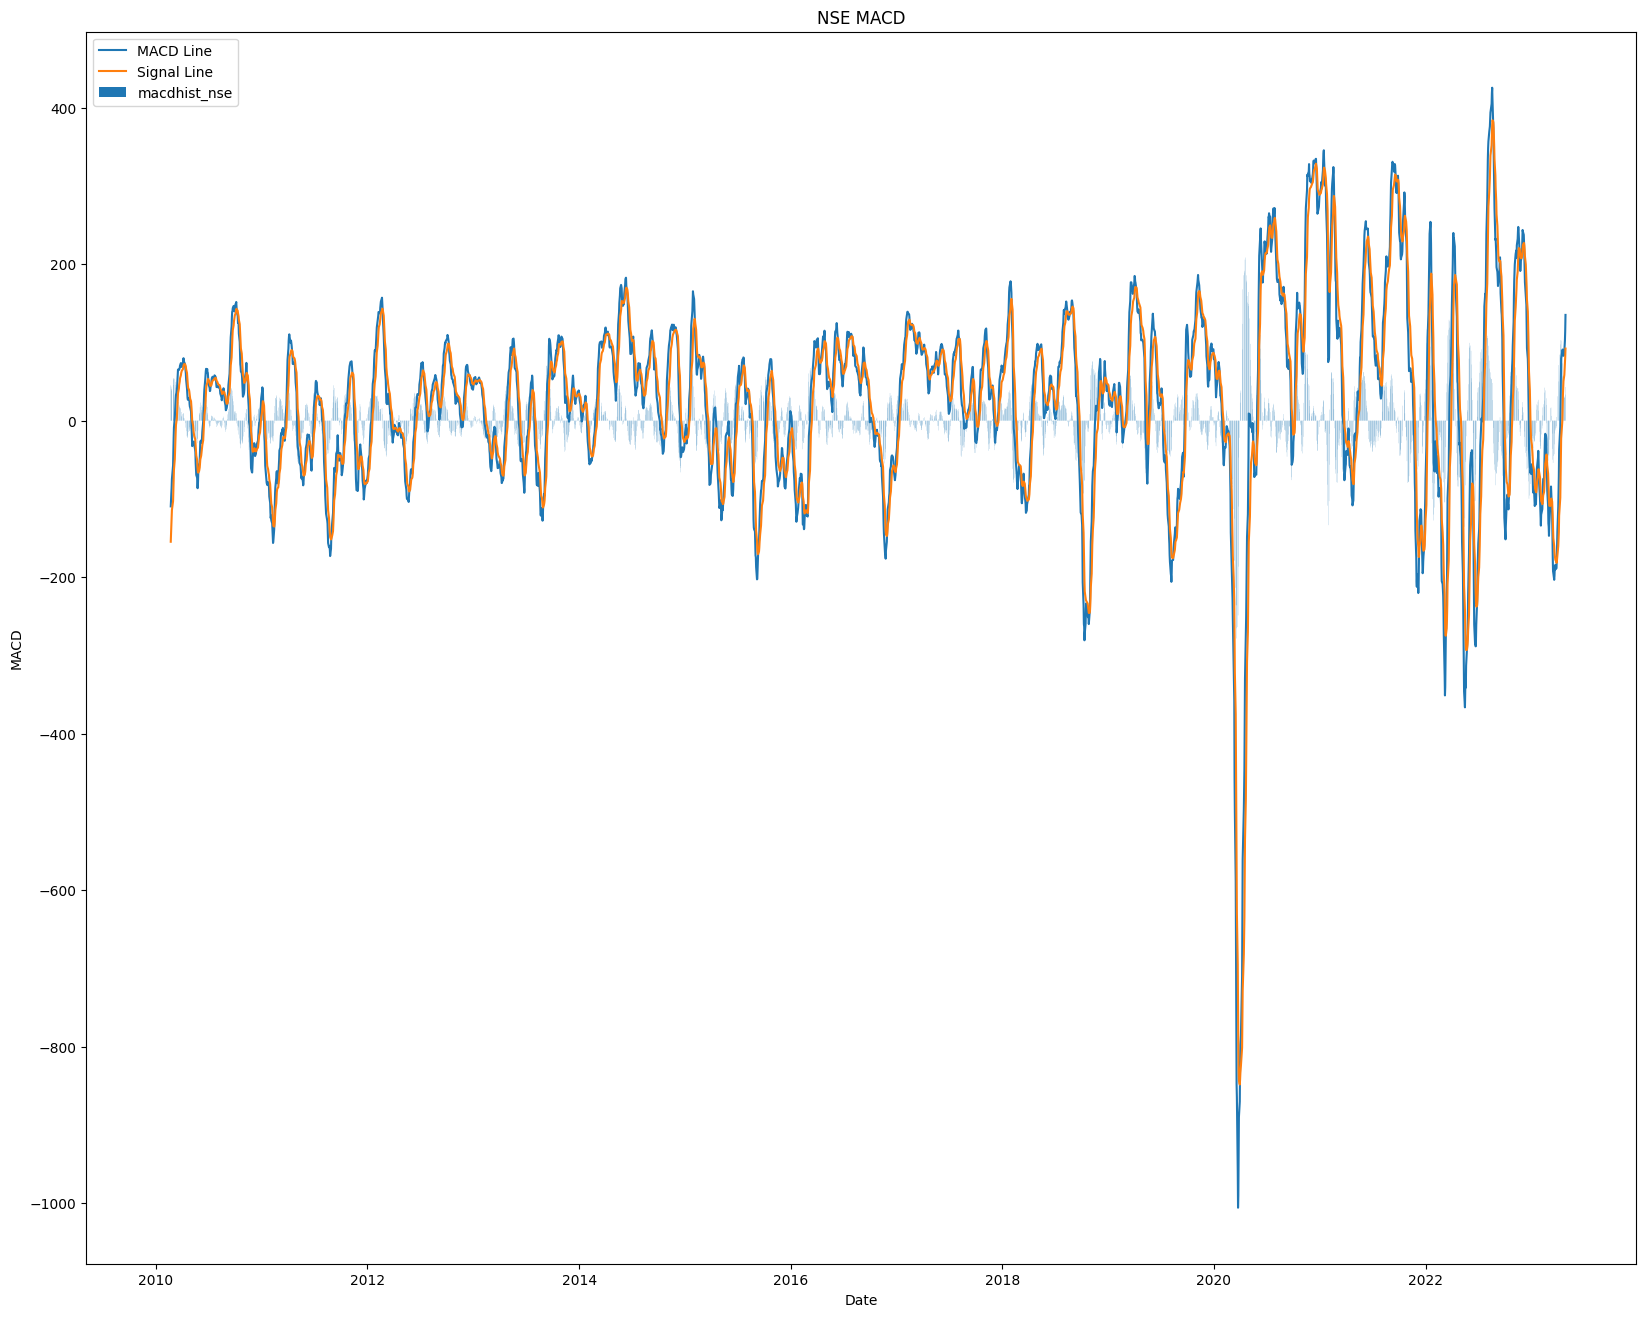

In [316]:
plt.figure(figsize=(30, 15))
plt.plot( data_1['Close'])
plt.scatter(data_1.index, data_1.buysig_macd, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data_1.index, data_1.sellsig_macd, marker = 'v', color = 'red', label = 'SELL', s = 200)

plt.figure(figsize=(20, 16))
plt.plot(data_1.index, macd_nse, label='MACD Line')
plt.plot(data_1.index, macdsignal_nse, label='Signal Line')
plt.bar( data_1.index,data_1['macdhist_nse'].fillna(0),width=0.5, snap=False,label='macdhist_nse')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('NSE MACD')
plt.legend()
plt.show()

In [365]:
buy_sig_md=pd.DataFrame(data_1['buysig_macd']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(data_1['sellsig_macd']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)

np_buy_md=np_buy_md[:-1]

In [366]:
print("CUMM_Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")

CUMM_Return_MACD 15.06725766327907 %


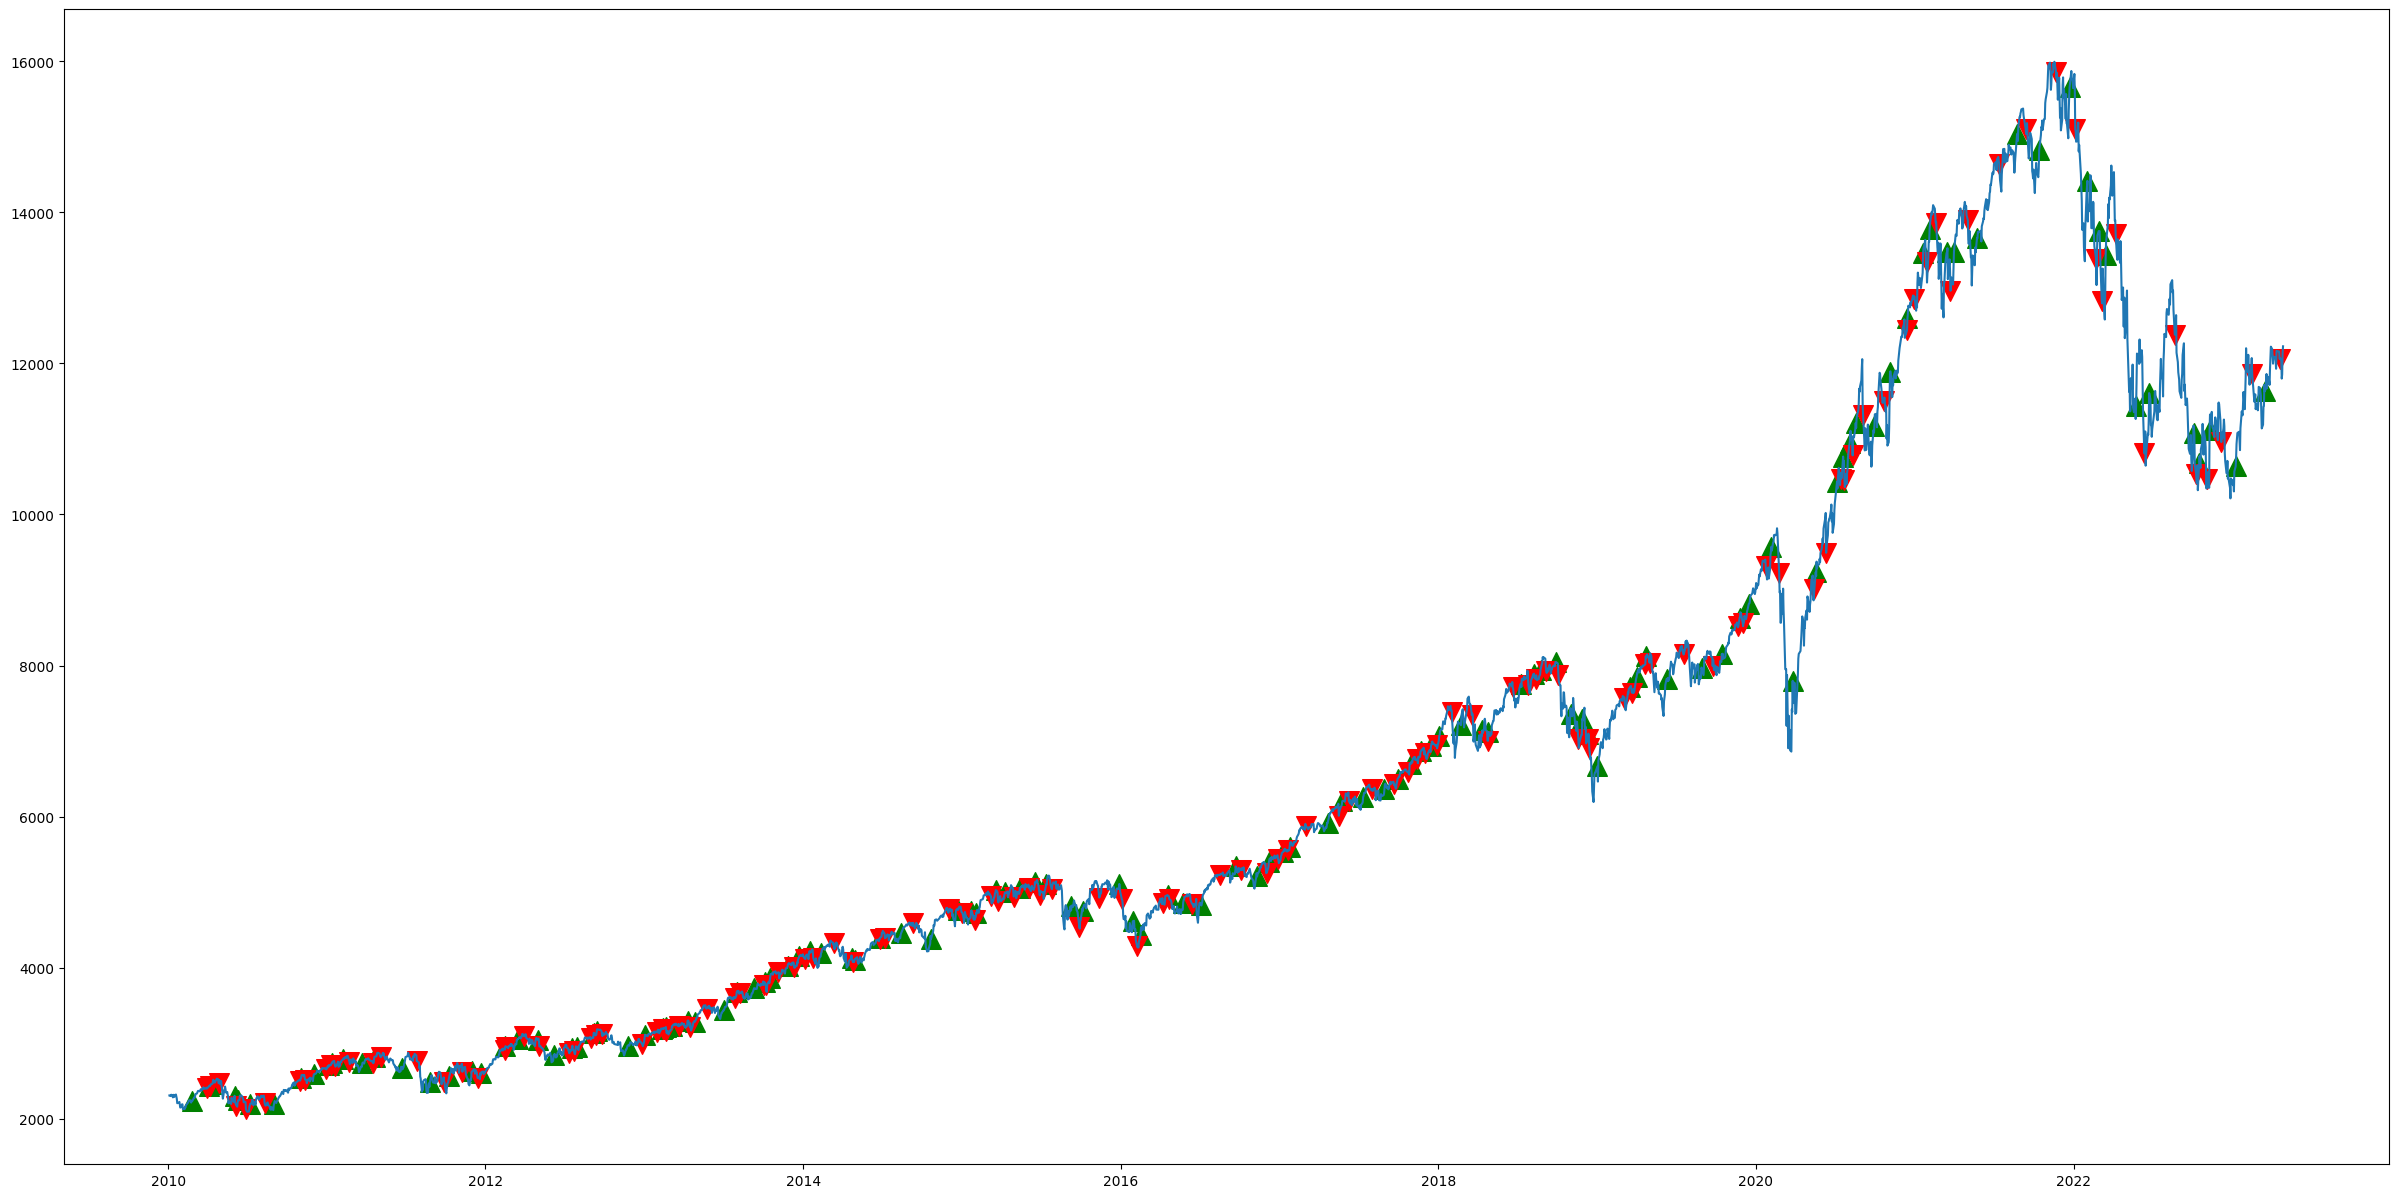

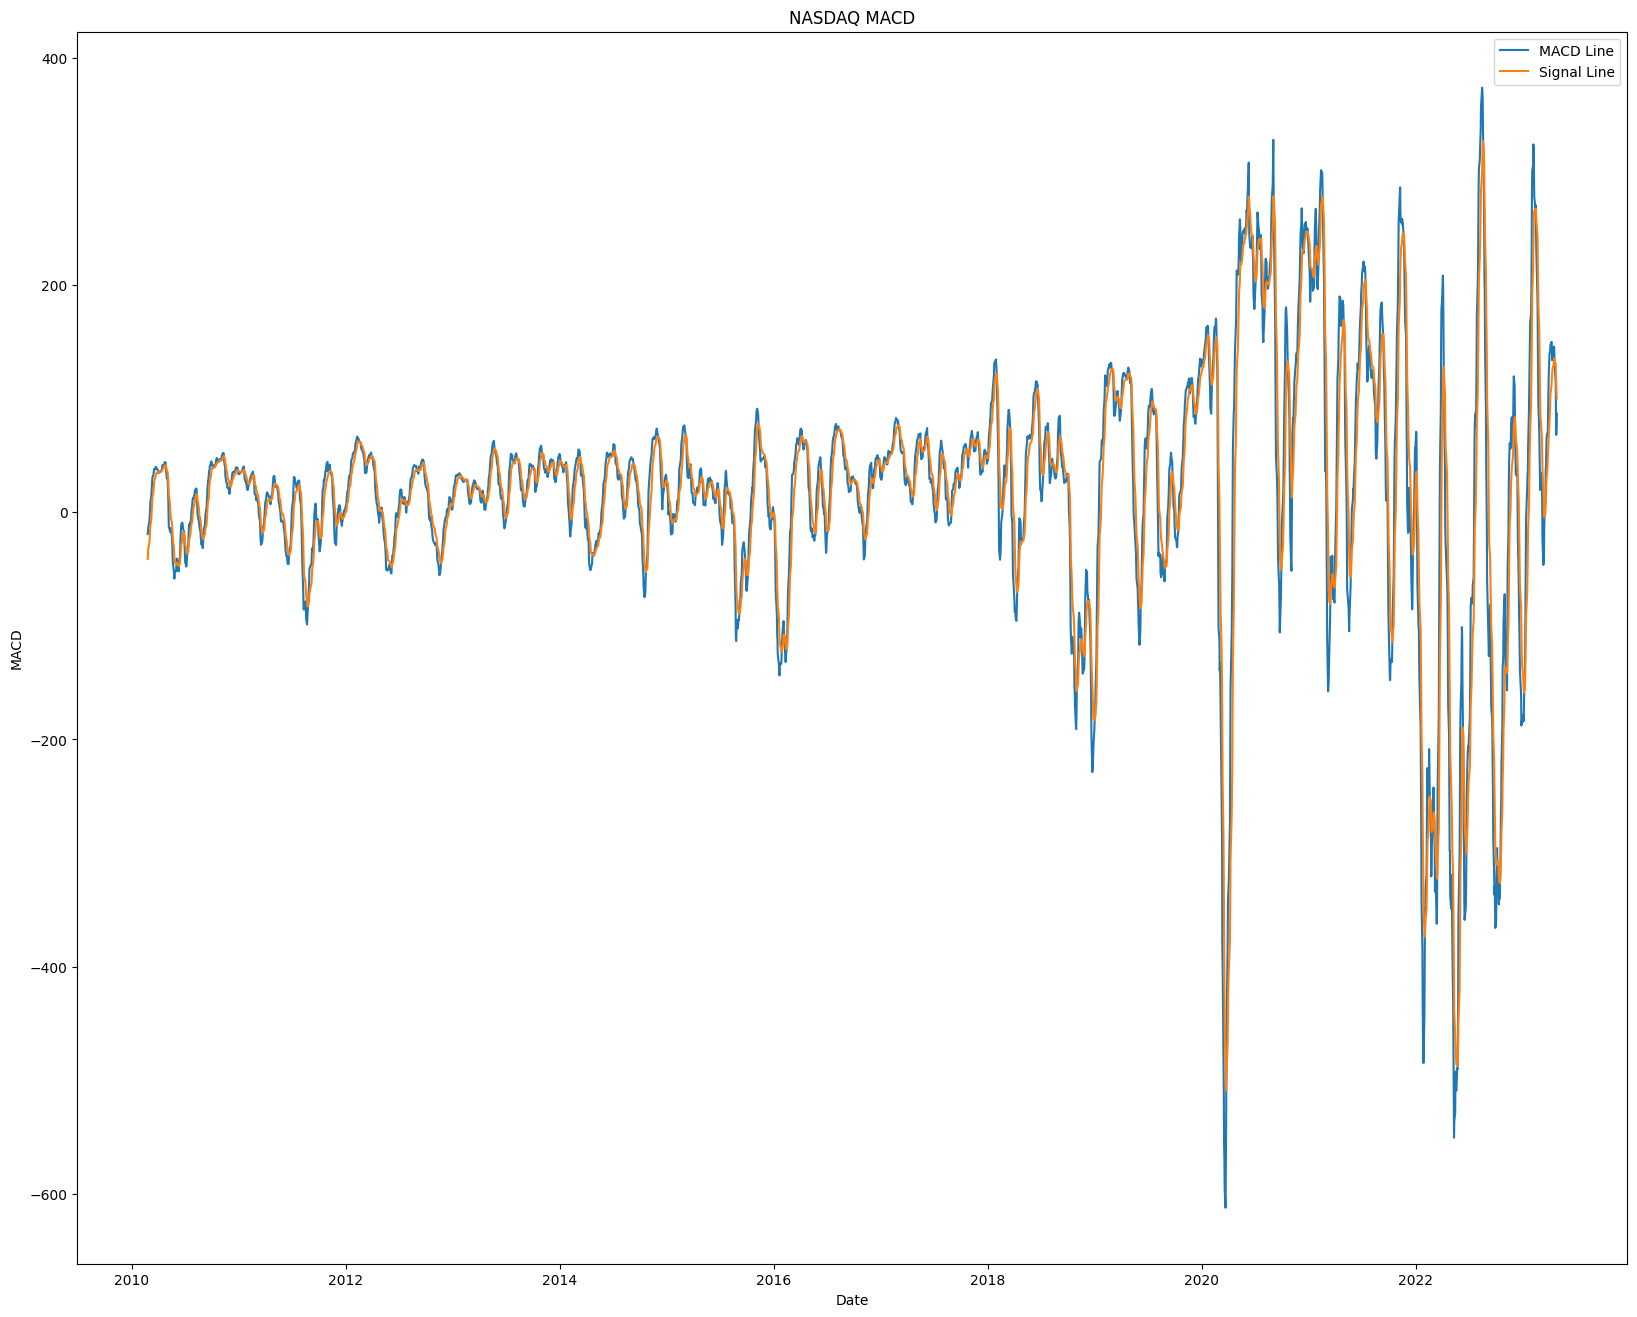

In [317]:
plt.figure(figsize=(30, 15))
plt.plot( merged_df['Close_y'])
plt.scatter(merged_df.index, merged_df.buysig_macd, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(merged_df.index, merged_df.sellsig_macd, marker = 'v', color = 'red', label = 'SELL', s = 200)

plt.figure(figsize=(20, 16))
plt.plot(merged_df.index, macd_nasdaq, label='MACD Line')
plt.plot(merged_df.index, macdsignal_nasdaq, label='Signal Line')

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('NASDAQ MACD')
plt.legend()
plt.show()

In [375]:
buy_sig_md=pd.DataFrame(merged_df['buysig_macd']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(merged_df['sellsig_macd']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)


In [376]:
print("CUMM_Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")

CUMM_Return_MACD 15.607736865129615 %


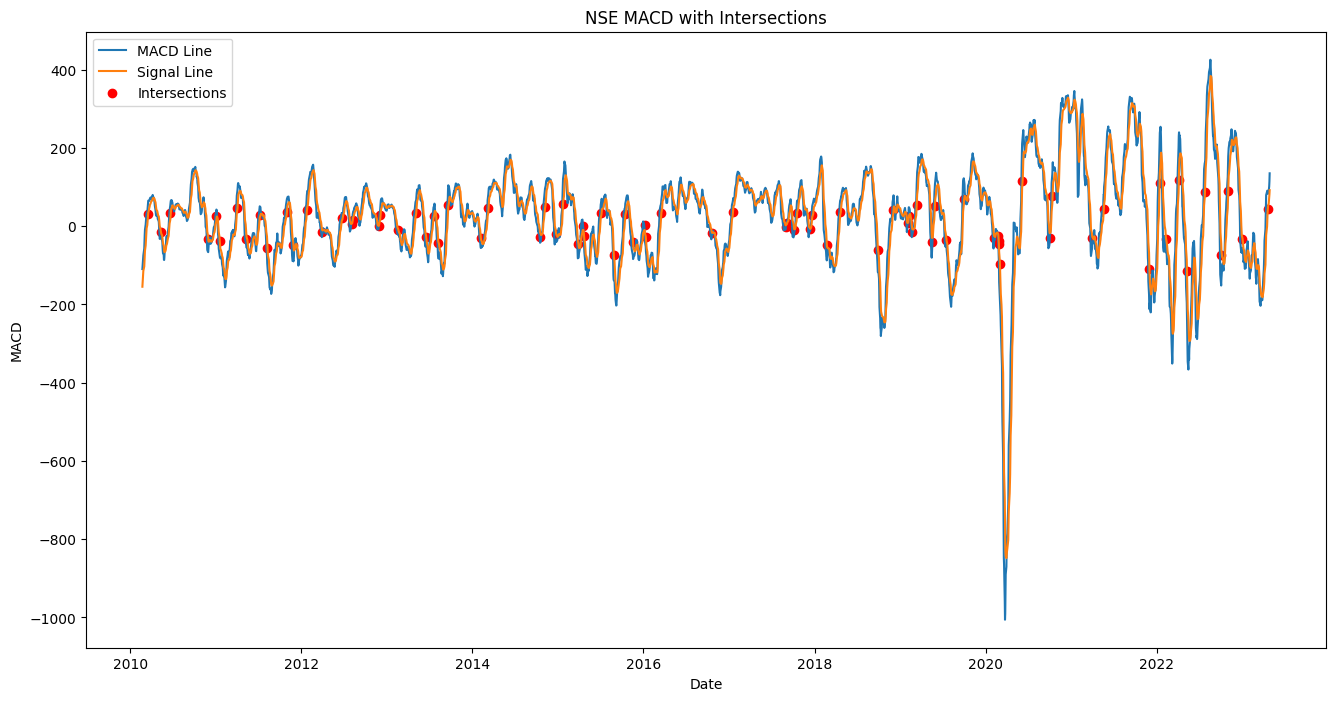

In [318]:
intersections_nse = np.where(np.diff(np.sign(macdhist_nse - macdsignal_nse)))[0]
intersections_nasdaq = np.where(np.diff(np.sign(macdhist_nasdaq - macdsignal_nasdaq)))[0]

plt.figure(figsize=(16, 8)) 
plt.plot(data_1.index, macd_nse, label='MACD Line')
plt.plot(data_1.index, macdsignal_nse, label='Signal Line')
plt.scatter(data_1.index[intersections_nse], macdhist_nse[intersections_nse], color='red', marker='o', label='Intersections')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('NSE MACD with Intersections')
plt.legend()
plt.show()


In [319]:
data_1.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,MACDsig,macdhist_nse,buysig_macd,sellsig_macd
Date,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN,NaN,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,NaN,NaN,NaN,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,NaN,NaN,NaN,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,NaN,NaN,NaN,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,NaN,NaN,NaN,NaN,NaN


In [320]:
buy_macd_nse= pd.DataFrame(data_1['buysig_macd'])
buy_macd_nse=buy_macd_nse.fillna(0)
buy_macd_nse=buy_macd_nse[~(buy_macd_nse == 0).all(axis=1)]
sell_macd_nse= pd.DataFrame(data_1['sellsig_macd'])
sell_macd_nse=sell_macd_nse.fillna(0)
sell_macd_nse=sell_macd_nse[~(sell_macd_nse == 0).all(axis=1)]
buy_macd_nse=np.array(buy_macd_nse)
sell_macd_nse=np.array(sell_macd_nse)
buy_macd_nse=buy_macd_nse[:-1]

In [321]:
def sharpe_ratio(data):
    mean_daily_return = data.mean()
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_macd_nse-buy_macd_nse)

0.16999485033998618

In [322]:
def sortino_ratio(data):
    mean_return = data.mean()
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_macd_nse-buy_macd_nse)

0.3973607641799635

In [323]:
buy_macd_ndaq= pd.DataFrame(merged_df.buysig_macd)
buy_macd_ndaq=buy_macd_ndaq.fillna(0)
buy_macd_ndaq=buy_macd_ndaq[~(buy_macd_ndaq == 0).all(axis=1)]
sell_macd_ndaq= pd.DataFrame(merged_df.sellsig_macd)
sell_macd_ndaq=sell_macd_ndaq.fillna(0)
sell_macd_ndaq=sell_macd_ndaq[~(sell_macd_ndaq == 0).all(axis=1)]
buy_macd_ndaq=np.array(buy_macd_ndaq)
sell_macd_ndaq=np.array(sell_macd_ndaq)

In [324]:
def sharpe_ratio(data, risk_free_rate=0.03):
    mean_daily_return = data.mean()
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_macd_ndaq-buy_macd_ndaq)

0.16306519847293824

In [325]:
def sortino_ratio(data):
    mean_return = data.mean()
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_macd_ndaq-buy_macd_ndaq)

0.25387959880263317

In [326]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0

    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal

In [327]:
close_prices = data_1['Close']

upper_band, middle_band, lower_band = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

data_1['upper_bb']=upper_band
data_1['lower_bb']=lower_band

buyprice_bb_nse, sellprice_bb_nse, bb_signal = implement_bb_strategy(data_1['Close'], data_1['lower_bb'], data_1['upper_bb'])

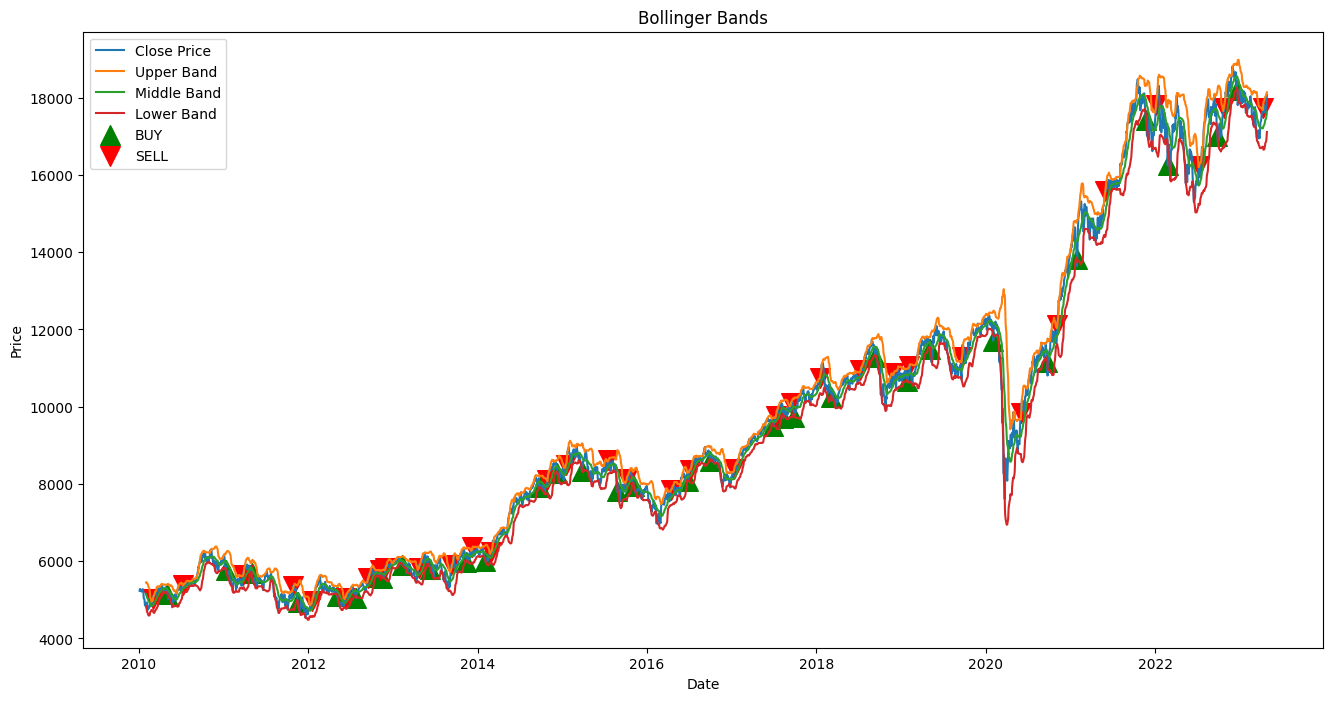

In [328]:
plt.figure(figsize=(16, 8))
plt.plot(close_prices, label='Close Price')
plt.plot(upper_band, label='Upper Band')
plt.plot(middle_band, label='Middle Band')
plt.plot(lower_band, label='Lower Band')
plt.scatter(data_1.index, buyprice_bb_nse, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data_1.index, sellprice_bb_nse, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [359]:
buy_bb_nse=pd.DataFrame(buyprice_bb_nse)
buy_bb_nse=buy_bb_nse.fillna(0)
buy_bb_nse=buy_bb_nse[~(buy_bb_nse == 0).all(axis=1)]
sell_bb_nse=pd.DataFrame(sellprice_bb_nse)
sell_bb_nse=sell_bb_nse.fillna(0)
sell_bb_nse=sell_bb_nse[~(sell_bb_nse == 0).all(axis=1)]
buy_bb_nse=np.array(buy_bb_nse)
sell_bb_nse=np.array(sell_bb_nse)

buy_bb_nse=np.delete(buy_bb_nse,8,0)

sell_bb_nse=sell_bb_nse[:-2]

def sharpe_ratio(data):
    mean_daily_return = data.mean()
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_bb_nse-buy_bb_nse)

-0.4629760701762277

In [330]:
def sortino_ratio(data):
    mean_return = data.mean()
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_bb_nse-buy_bb_nse)

-0.49808055015185365

In [352]:
print("CUMM_Return_BB",((buy_bb-np_buy_bb)/np_buy_bb).max()*100,"%")

CUMM_Return_BB nan %


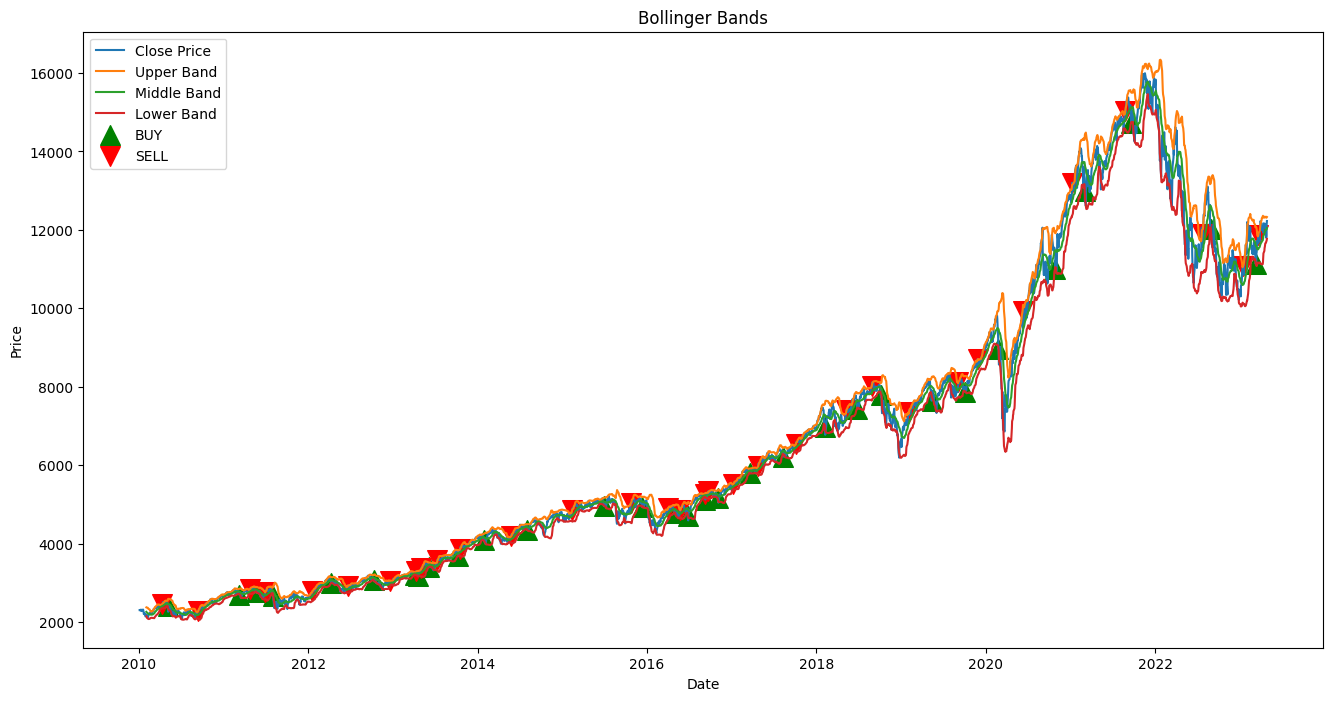

In [331]:
close_prices = merged_df['Close_y']

upper_band, middle_band, lower_band = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

merged_df['upper_bb']=upper_band
merged_df['lower_bb']=lower_band

buyprice_bb_ndaq, sellprice_bb_ndaq, bb_signal = implement_bb_strategy(merged_df['Close_y'], merged_df['lower_bb'], merged_df['upper_bb'])

plt.figure(figsize=(16, 8))
plt.plot(close_prices, label='Close Price')
plt.plot(upper_band, label='Upper Band')
plt.plot(middle_band, label='Middle Band')
plt.plot(lower_band, label='Lower Band')
plt.scatter(merged_df.index, buyprice_bb_ndaq, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(merged_df.index, sellprice_bb_ndaq, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [332]:
buy_bb_ndaq=pd.DataFrame(buyprice_bb_ndaq)
buy_bb_ndaq=buy_bb_ndaq.fillna(0)
buy_bb_ndaq=buy_bb_ndaq[~(buy_bb_ndaq == 0).all(axis=1)]
sell_bb_ndaq=pd.DataFrame(sellprice_bb_ndaq)
sell_bb_ndaq=sell_bb_ndaq.fillna(0)
sell_bb_ndaq=sell_bb_ndaq[~(sell_bb_ndaq == 0).all(axis=1)]
buy_bb_ndaq=np.array(buy_bb_ndaq)
sell_bb_ndaq=np.array(sell_bb_ndaq)

buy_bb_ndaq=np.delete(buy_bb_ndaq,8,0)

sell_bb_ndaq=sell_bb_ndaq[:-2]

def sharpe_ratio(data):
    mean_daily_return = data.mean()
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_bb_ndaq-buy_bb_ndaq)

-0.33770715280849406

In [333]:
def sortino_ratio(data):
    mean_return = data.mean()
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_bb_ndaq-buy_bb_ndaq)

-0.44803162842626665

In [334]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal

In [335]:
high_prices = data_1['High']
low_prices = data_1['Low'] 
close_prices = data_1['Close']

atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=14)

sma = talib.SMA(close_prices, timeperiod=20)

upper_band = sma + 2 * atr
lower_band = sma - 2 * atr

data_1['upper_kc']= upper_band
data_1['lower_kc']=lower_band

buy_price, sell_price, kc_signal = implement_kc_strategy(data_1['Close'], data_1['upper_kc'], data_1['lower_kc'])
data_1=data_1.iloc[:-1,:]

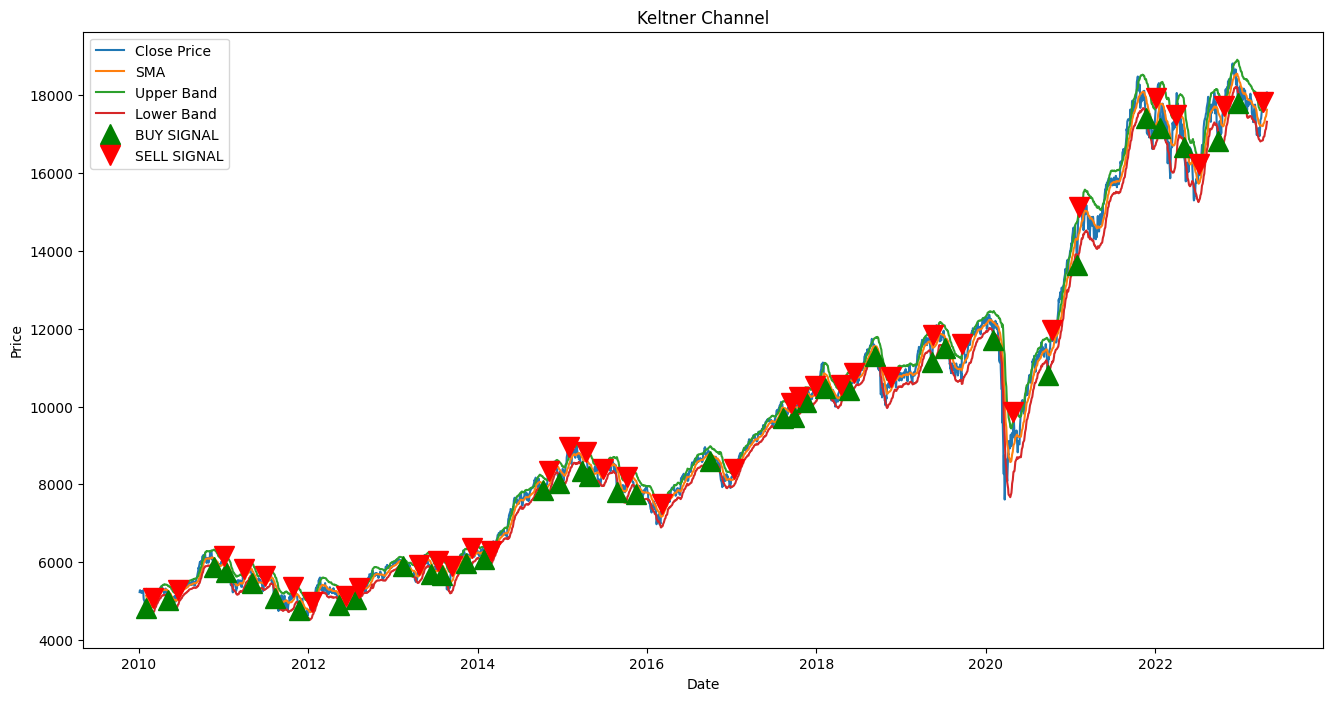

In [336]:
plt.figure(figsize=(16, 8))  
plt.plot(close_prices, label='Close Price')
plt.plot(sma, label='SMA')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.plot(data_1.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data_1.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Keltner Channel')
plt.legend()
plt.show()

In [337]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]

np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [338]:
def sharpe_ratio(data, risk_free_rate=0.03):
    mean_daily_return = data.mean()
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.48845665789743503

In [339]:
def sortino_ratio(data):
    mean_return = data.mean()
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.41757333315362777

In [350]:
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

CUMM_Return_KC 12.269479057878051 %


In [340]:
high_prices = merged_df['High_y']
low_prices = merged_df['Low_y'] 
close_prices = merged_df['Close_y']

atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=14)

sma = talib.SMA(close_prices, timeperiod=20)

upper_band = sma + 2 * atr
lower_band = sma - 2 * atr

merged_df['upper_kc']= upper_band
merged_df['lower_kc']=lower_band

buy_price, sell_price, kc_signal = implement_kc_strategy(merged_df['Close_y'], merged_df['upper_kc'], merged_df['lower_kc'])
merged_df=merged_df.iloc[:-1,:]

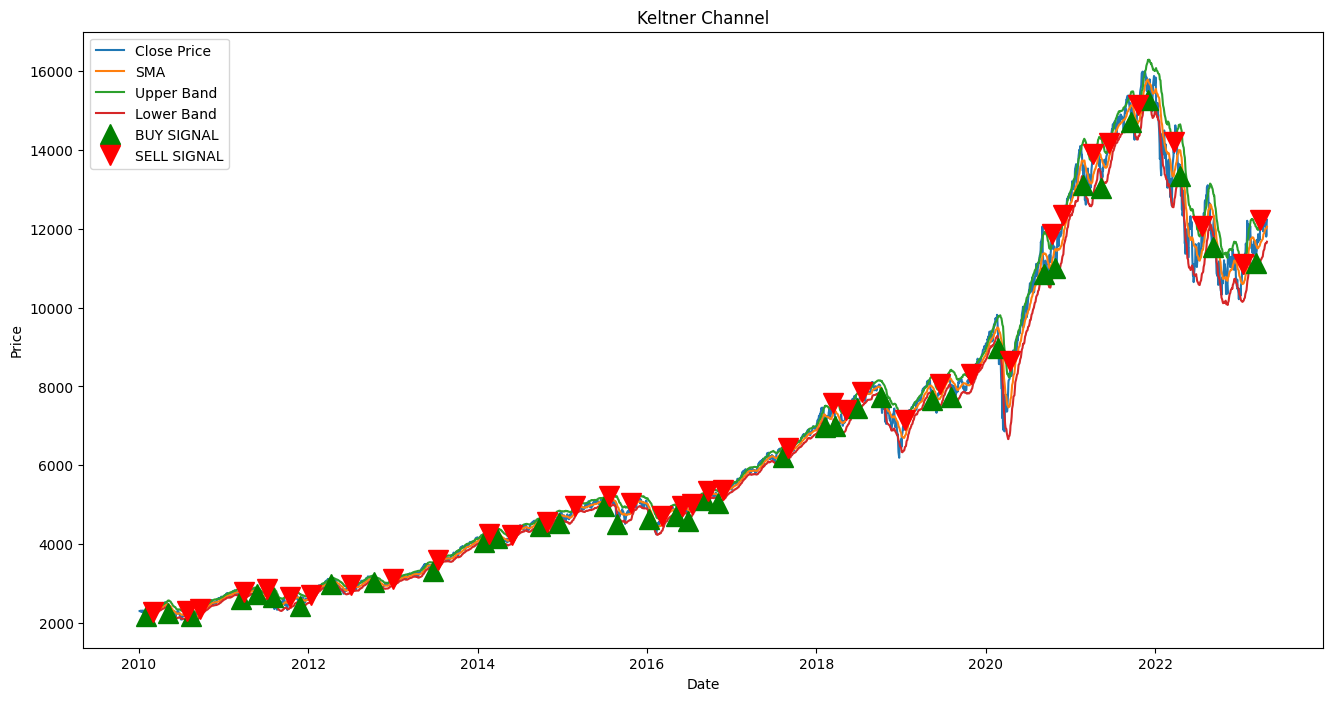

In [341]:
plt.figure(figsize=(16, 8))  
plt.plot(close_prices, label='Close Price')
plt.plot(sma, label='SMA')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.plot(merged_df.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(merged_df.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Keltner Channel')
plt.legend()
plt.show()

In [342]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]

np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [348]:
def sharpe_ratio(data):
    mean_daily_return = data.mean()
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.4583913107170446

In [344]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.5185060054612435

In [349]:
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

CUMM_Return_KC 12.269479057878051 %
